In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import numpy.testing as npt

In [3]:
from scalcs import popen
from scalcs.samples import samples
from scalcs import scalcslib as scl
from scalcs import scplotlib as scpl

In [4]:
mec = samples.CH82()
tres = 0.0
pc = popen.PopenCurve(mec, tres)

In [5]:
assert len(pc._pilot_conc) == 1000
assert len(pc._pilot_popen) == 1000

In [6]:
npt.assert_almost_equal(pc.maxPopen, 0.9677419329868882, decimal=16)
npt.assert_almost_equal(pc.EC50, 2.403813848843297e-06, decimal=16)
#npt.assert_almost_equal(pc.nH, 1.8920149941304116, decimal=16)

In [7]:
assert pc.is_not_decreasing
assert not pc.is_not_increasing
assert pc.is_monotonic
assert not pc.is_decreasing
assert pc.is_increasing

In [8]:
c = pc._pilot_conc
y = pc._pilot_popen

In [10]:
nearest_idx = np.searchsorted(c, pc.EC50, side="left")
print(nearest_idx-1, c[nearest_idx-1], y[nearest_idx-1])
print(nearest_idx, c[nearest_idx], y[nearest_idx])

455 2.378901041078891e-06 0.4791007240220817
456 2.4569164629827902e-06 0.49386679167250686


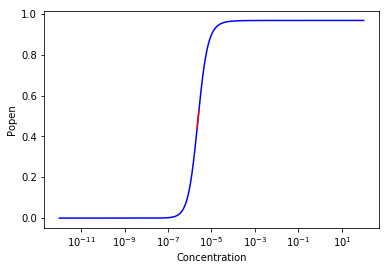

In [12]:
plt.semilogx(c, y, 'b', pc.c50, pc.y50, 'r')
plt.ylabel('Popen')
plt.xlabel('Concentration');

In [13]:
slope, intercept = np.polyfit(np.log(pc.c50), np.log(pc.y50/(1-pc.y50)), 1)
print(slope, intercept)

1.8337841137841466 23.66144866442831
